In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import os, cv2
import itertools
from tqdm import tqdm 
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd

%load_ext tensorboard
import tensorflow as tf

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [3]:
scaler = MinMaxScaler()

In [4]:
def resize_data(data):
    initial_size_x = data.shape[0]
    initial_size_y = data.shape[1]
    initial_size_z = data.shape[2]
    new_size_x = 64
    new_size_y = 32
    new_size_z = 32
    delta_x = initial_size_x / new_size_x
    delta_y = initial_size_y / new_size_y
    delta_z = initial_size_z / new_size_z
    new_data = np.zeros((new_size_x, new_size_y, new_size_z))
    for x, y, z in itertools.product(range(new_size_x),
                                     range(new_size_y),
                                     range(new_size_z)):
        new_data[x][y][z] = data[int(x * delta_x)][int(y * delta_y)][int(z * delta_z)]
    return new_data

In [5]:
imgs = []
train_path = "ImageCHD_dataset/train/images/"
for images in tqdm(os.listdir(train_path)):
    image_name = train_path + images
    img = nib.load(image_name).get_fdata()
    img=scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = resize_data(img)
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2],1)
    imgs.append(img)
imgs = np.array(imgs)

100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [05:08<00:00,  4.47s/it]


columns = ['0','1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16']
df = pd.DataFrame(columns=columns)

In [6]:
labels = []
train_path = "ImageCHD_dataset/train/labels/"
for images in tqdm(os.listdir(train_path)):
    image_name = train_path + images
    img = nib.load(image_name).get_fdata()
    img=scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = resize_data(img)
#     val, counts = np.unique(img, return_counts=True)
#     zipped = zip(columns, counts)
#     conts_dict = dict(zipped)    
#     df = df.append(conts_dict, ignore_index=True)
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2],1)
    labels.append(img)
labels = np.array(labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [04:18<00:00,  3.75s/it]


In [7]:
img = imgs[0]
msk = labels[0]
print(img.shape,msk.shape)

(64, 32, 32, 1) (64, 32, 32, 1)


In [8]:
val_imgs = []
val_path = "ImageCHD_dataset/val/images/"
for images in tqdm(os.listdir(val_path)):
    image_name = val_path + images
    img = nib.load(image_name).get_fdata()
    img=scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = resize_data(img)
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2],1)
    val_imgs.append(img)
val_imgs = np.array(val_imgs)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [03:00<00:00,  4.40s/it]


In [9]:
val_labels = []
val_path = "ImageCHD_dataset/val/labels/"
for images in tqdm(os.listdir(val_path)):
    image_name = val_path + images
    img = nib.load(image_name).get_fdata()
    img=scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = resize_data(img)
#     val, counts = np.unique(img, return_counts=True)
#     zipped = zip(columns, counts)
#     conts_dict = dict(zipped)    
#     df = df.append(conts_dict, ignore_index=True)
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2],1)
    val_labels.append(img)
val_labels = np.array(val_labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [02:48<00:00,  4.11s/it]


In [10]:
labels = to_categorical(labels,17)

In [11]:
val_labels = to_categorical(val_labels,17)

import random

test_img=img
test_mask=msk
print(test_img.shape,test_mask.shape)
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_img[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

val, counts = np.unique(test_mask, return_counts=True)
print(val, counts,len(val),len(counts))

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
label_4 = df['4'].sum()
label_5 = df['5'].sum()
label_6 = df['6'].sum()
label_7 = df['7'].sum()
label_8 = df['8'].sum()
label_9 = df['9'].sum()
label_10 = df['10'].sum()
label_11 = df['11'].sum()
label_12 = df['12'].sum()
label_13 = df['13'].sum()
label_14 = df['14'].sum()
label_15 = df['15'].sum()
label_16 = df['16'].sum()

total_labels = label_0 + label_1 + label_2 + label_3 + label_4 + label_5 + label_6 + label_7 + label_8 + label_9 + label_10 + label_11 + label_12 + label_13 + label_14 + label_15 + label_16 
n_classes = 17

wt0 = round((total_labels/(n_classes*label_0)), 2) 
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)
wt4 = round((total_labels/(n_classes*label_4)), 2) 
wt5 = round((total_labels/(n_classes*label_5)), 2)
wt6 = round((total_labels/(n_classes*label_6)), 2)
wt7 = round((total_labels/(n_classes*label_7)), 2)
wt8 = round((total_labels/(n_classes*label_8)), 2) 
wt9 = round((total_labels/(n_classes*label_9)), 2)
wt10 = round((total_labels/(n_classes*label_10)), 2)
wt11 = round((total_labels/(n_classes*label_11)), 2)
wt12 = round((total_labels/(n_classes*label_12)), 2)
wt13 = round((total_labels/(n_classes*label_13)), 2)
wt14 = round((total_labels/(n_classes*label_14)), 2)
wt15 = round((total_labels/(n_classes*label_15)), 2)
wt16 = round((total_labels/(n_classes*label_16)), 2)

In [12]:
n_classes = 17

In [13]:
class_weights=np.array([0.06, 14.65, 14.65, 9.14, 10.64, 7.02, 9.19, 6.45, 11.37, 9.82, 19.46, 20.7, 31.55, 58.47, 60.21, 246.8, 179.64])

In [14]:
import segmentation_models_3D as sm

dice_loss = sm.losses.DiceLoss(class_weights=class_weights) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

Segmentation Models: using `keras` framework.


In [15]:
import segmentation_models_3D as sm


metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

In [16]:
LR = 0.001
optimizer = tf.keras.optimizers.Adam(LR)

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' 

In [18]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(p4)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(p3)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()
    
    return model

In [24]:
model = simple_unet_model(64,32,32,1,17)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 32, 32,  0           []                               
                                 1)]                                                              
__________________________________________________________________________________________________
conv3d_17 (Conv3D)              (None, 64, 32, 32,   448         ['input_2[0][0]']                
                                16)                                                               
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 64, 32, 32,   0           ['conv3d_17[0][0]']              
                                16)                                                         

In [25]:
#model.compile(optimizer = optimizer, loss=total_loss, metrics=metrics)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=metrics)

In [26]:
class_names = ["ASD","VSD","AVSD","ToF","TGA","DORV","CAT","CA","AAH","DAA","IAA","PuA","APVC","DSVC","PDA","PAS","Normal"]
print(len(class_names))

17


In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
history=model.fit(imgs,labels,epochs=100,batch_size=1,callbacks=[tensorboard_callback], validation_data=(val_imgs,val_labels),verbose=1)  

Epoch 1/100
69/69 [==============================] - 6s 89ms/step - loss: 0.0247 - accuracy: 0.9929 - iou_score: 0.9410 - val_loss: 0.0254 - val_accuracy: 0.9935 - val_iou_score: 0.9409
Epoch 2/100
69/69 [==============================] - 5s 79ms/step - loss: 0.0254 - accuracy: 0.9930 - iou_score: 0.9409 - val_loss: 0.0227 - val_accuracy: 0.9935 - val_iou_score: 0.9408
Epoch 3/100
69/69 [==============================] - 5s 80ms/step - loss: 0.0250 - accuracy: 0.9930 - iou_score: 0.9410 - val_loss: 0.0256 - val_accuracy: 0.9935 - val_iou_score: 0.9408
Epoch 4/100
69/69 [==============================] - 5s 79ms/step - loss: 0.0243 - accuracy: 0.9929 - iou_score: 0.9409 - val_loss: 0.0244 - val_accuracy: 0.9935 - val_iou_score: 0.9408
Epoch 5/100
69/69 [==============================] - 5s 79ms/step - loss: 0.0229 - accuracy: 0.9929 - iou_score: 0.9409 - val_loss: 0.0222 - val_accuracy: 0.9935 - val_iou_score: 0.9409
Epoch 6/100
69/69 [==============================] - 5s 79ms/step - lo

Epoch 45/100
69/69 [==============================] - 6s 80ms/step - loss: 0.0084 - accuracy: 0.9969 - iou_score: 0.9738 - val_loss: 0.0211 - val_accuracy: 0.9937 - val_iou_score: 0.9556
Epoch 46/100
69/69 [==============================] - 5s 80ms/step - loss: 0.0085 - accuracy: 0.9968 - iou_score: 0.9736 - val_loss: 0.0221 - val_accuracy: 0.9935 - val_iou_score: 0.9540
Epoch 47/100
69/69 [==============================] - 6s 80ms/step - loss: 0.0090 - accuracy: 0.9966 - iou_score: 0.9722 - val_loss: 0.0211 - val_accuracy: 0.9939 - val_iou_score: 0.9545
Epoch 48/100
69/69 [==============================] - 6s 80ms/step - loss: 0.0085 - accuracy: 0.9968 - iou_score: 0.9734 - val_loss: 0.0221 - val_accuracy: 0.9943 - val_iou_score: 0.9532
Epoch 49/100
69/69 [==============================] - 6s 80ms/step - loss: 0.0086 - accuracy: 0.9968 - iou_score: 0.9734 - val_loss: 0.0205 - val_accuracy: 0.9940 - val_iou_score: 0.9540
Epoch 50/100
69/69 [==============================] - 5s 80ms/ste

Epoch 89/100
69/69 [==============================] - 5s 78ms/step - loss: 0.0048 - accuracy: 0.9981 - iou_score: 0.9838 - val_loss: 0.0266 - val_accuracy: 0.9937 - val_iou_score: 0.9576
Epoch 90/100
69/69 [==============================] - 5s 78ms/step - loss: 0.0043 - accuracy: 0.9983 - iou_score: 0.9849 - val_loss: 0.0256 - val_accuracy: 0.9935 - val_iou_score: 0.9574
Epoch 91/100
69/69 [==============================] - 5s 78ms/step - loss: 0.0041 - accuracy: 0.9984 - iou_score: 0.9855 - val_loss: 0.0283 - val_accuracy: 0.9937 - val_iou_score: 0.9571
Epoch 92/100
69/69 [==============================] - 5s 78ms/step - loss: 0.0040 - accuracy: 0.9984 - iou_score: 0.9859 - val_loss: 0.0287 - val_accuracy: 0.9938 - val_iou_score: 0.9567
Epoch 93/100
69/69 [==============================] - 5s 78ms/step - loss: 0.0044 - accuracy: 0.9983 - iou_score: 0.9849 - val_loss: 0.0277 - val_accuracy: 0.9937 - val_iou_score: 0.9578
Epoch 94/100
69/69 [==============================] - 5s 78ms/ste

In [32]:
model.save('model.h5')

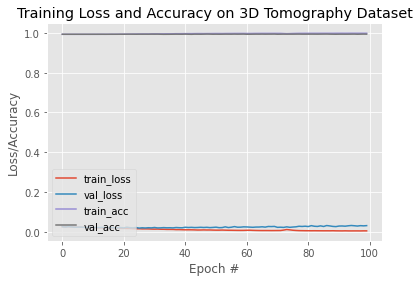

In [35]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on 3D Tomography Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("graph.png")

(64, 32, 32, 1) (64, 32, 32, 1) (64, 32, 32)


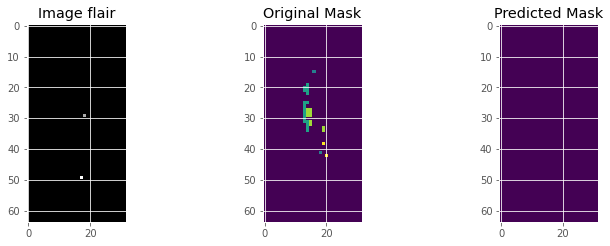

In [65]:
import random

test_img=img 
test_mask=msk 
test = np.expand_dims(test_mask,axis=0)
pred_test_mask = model.predict(test)
test_prediction_argmax=np.argmax(pred_test_mask, axis=4)[0,:,:,:]
print(test_img.shape,test_mask.shape,test_prediction_argmax.shape) 

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(231) 
plt.imshow(test_img[:,:,n_slice], cmap='gray') 
plt.title('Image flair') 
plt.subplot(232) 
plt.imshow(test_mask[:,:,n_slice]) 
plt.title('Original Mask') 
plt.subplot(233) 
#plt.imshow(test_mask[:,:,n_slice]) 
plt.imshow(test_prediction_argmax[:,:,n_slice]) 
plt.title('Predicted Mask') 
plt.show()

batch_size=1
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

train_dataset = tf.data.Dataset.from_tensor_slices((imgs, labels))
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((val_imgs, val_labels))
val_dataset = val_dataset.batch(batch_size)

train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
    val_acc_metric.update_state(y, val_logits)

import time

epochs = len(imgs)
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        loss_value = train_step(x_batch_train, y_batch_train)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * 1))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        test_step(x_batch_val, y_batch_val)

    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))